<a href="https://colab.research.google.com/github/RmmR504/Portfolio/blob/Projects/Portfolio%20-%20Text%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run data preparation and building th corpus.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import regex as re
from nltk.stem import  PorterStemmer
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [ ]:
texto = pd.read_csv("/content/fnews.csv", encoding='ISO-8859-1', header=None)
texto.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
texto = texto.drop(texto.columns[0], axis=1)
texto = texto.reset_index(drop=True)
texto.head()

,1
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...


In [ ]:
print(len(texto) )

4846


Word frequency.

In [ ]:
conteo = texto.values.tolist()

# create list of lowercase words
texto_minusculas = []
for sentence in conteo:
    words = sentence[0].lower().split()
    texto_minusculas.extend(words)

# create dictionary
dic = {}
for palabra in texto_minusculas:
    if palabra in dic.keys():
        dic[palabra] = dic[palabra] + 1
    else:
        dic[palabra] = 1

print(dic)

{'according': 123, 'to': 2509, 'gran': 2, ',': 4662, 'the': 6066, 'company': 848, 'has': 578, 'no': 44, 'plans': 39, 'move': 22, 'all': 96, 'production': 130, 'russia': 85, 'although': 3, 'that': 434, 'is': 928, 'where': 32, 'growing': 19, '.': 4780, 'technopolis': 17, 'develop': 16, 'in': 2969, 'stages': 6, 'an': 326, 'area': 67, 'of': 3213, 'less': 11, 'than': 114, '100,000': 6, 'square': 21, 'meters': 6, 'order': 97, 'host': 2, 'companies': 121, 'working': 18, 'computer': 10, 'technologies': 25, 'and': 2593, 'telecommunications': 19, 'statement': 15, 'said': 544, 'international': 45, 'electronic': 22, 'industry': 86, 'elcoteq': 39, 'laid': 10, 'off': 35, 'tens': 2, 'employees': 77, 'from': 768, 'its': 646, 'tallinn': 11, 'facility': 47, ';': 30, 'contrary': 1, 'earlier': 83, 'layoffs': 8, 'contracted': 4, 'ranks': 1, 'office': 50, 'workers': 14, 'daily': 16, 'postimees': 1, 'reported': 53, 'with': 573, 'new': 267, 'plant': 118, 'would': 92, 'increase': 103, 'capacity': 50, 'meet': 8

Stemming

In [ ]:
stemmer = PorterStemmer()
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_stemmed = texto.applymap(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

print(df_stemmed)

                                                      1
0     accord to gran , the compani ha no plan to mov...
1     technopoli plan to develop in stage an area of...
2     the intern electron industri compani elcoteq h...
3     with the new product plant the compani would i...
4     accord to the compani 's updat strategi for th...
...                                                 ...
4841  london marketwatch -- share price end lower in...
4842  rinkuskiai 's beer sale fell by 6.5 per cent t...
4843  oper profit fell to eur 35.4 mn from eur 68.8 ...
4844  net sale of the paper segment decreas to eur 2...
4845  sale in finland decreas by 10.5 % in januari ,...

[4846 rows x 1 columns]


tokenization, removing Stopwords

In [ ]:
def tokenizar(texto):
    return re.findall("[\w-]+\p{L}+[\w]", texto)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = stopwords.words("english")
def quita_sw(vpalabras):
    return [ palabra for palabra in vpalabras if palabra not in sw]

In [ ]:
fn = [str.lower, tokenizar, quita_sw]

In [ ]:
def preprocesa_texto(texto, funciones):
  for funcion in funciones:
    if funcion == str.lower:
      texto = texto.apply(lambda x: x.str.lower())
    else:
      texto = texto.apply(lambda x: x.apply(funcion))
  return texto

In [ ]:
preprocesa_texto(texto, fn)

,1
0,"[according, gran, company, plans, move, produc..."
1,"[technopolis, plans, develop, stages, area, le..."
2,"[international, electronic, industry, company,..."
3,"[new, production, plant, company, would, incre..."
4,"[according, company, updated, strategy, years,..."
...,...
4841,"[london, marketwatch, share, prices, ended, lo..."
4842,"[rinkuskiai, beer, sales, fell, per, cent, mil..."
4843,"[operating, profit, fell, eur, eur, including,..."
4844,"[net, sales, paper, segment, decreased, eur, s..."


Hstogram

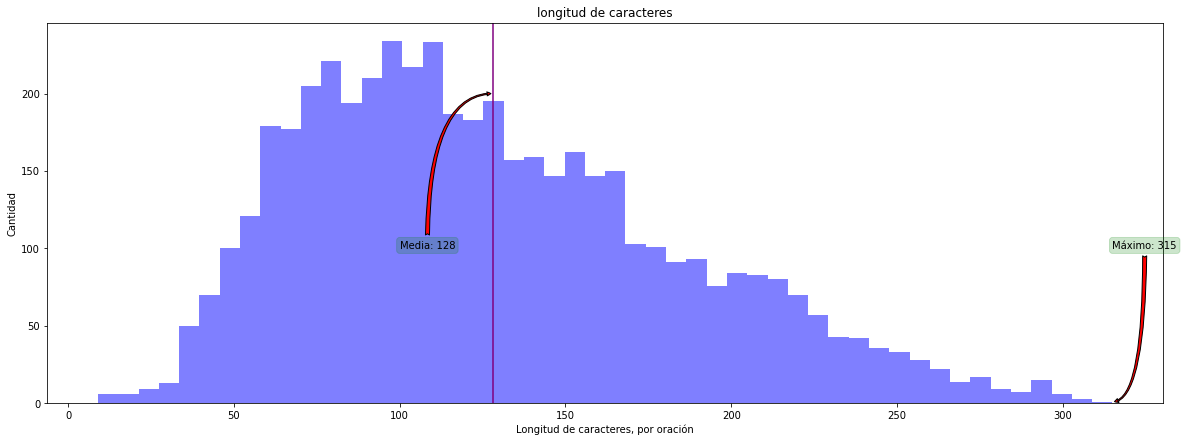

In [ ]:
#Espacio para la gráfica
fig, ax = plt.subplots(figsize=(20,7))
#Datos para graficar
ax = texto.iloc[:, 0].str.len().plot.hist(bins=50, alpha=0.5, color='blue')
#Linea vertical para ubicar la media
plt.axvline(x=texto.iloc[:, 0].str.len().mean(), ymin=0 , ymax=1, color='purple')
#Anotaciones de media y máximo
text_mean = 'Media: %d' % texto.iloc[:, 0].str.len().mean()
text_max = 'Máximo: %d' % texto.iloc[:, 0].str.len().max()

#configuración de caja de texto y flechas.
bbox = dict(boxstyle='Round', color='green', alpha=0.2, linewidth=0.9)
arrowprops = dict(facecolor='red', arrowstyle='fancy', connectionstyle='angle3')

#anotaciones de valores media y máximo
plt.annotate(text=text_mean, xy=(texto.iloc[:, 0].str.len().mean(), 200), xytext=(100, 100), arrowprops=arrowprops, bbox=bbox)
plt.annotate(text=text_max, xy=(texto.iloc[:, 0].str.len().max(), 1), xytext=(texto.iloc[:, 0].str.len().max(), 100), arrowprops=arrowprops, bbox=bbox)

#configuración de la gráfica
plt.title('longitud de caracteres')
plt.xlabel('Longitud de caracteres, por oración')
plt.ylabel('Cantidad')
plt.show()

Wordcloud

In [ ]:
def nube_palabras(corpus, stopwords, color):
    stopwords = set(stopwords)
    wordcloud = WordCloud(
        background_color=color,
        stopwords=stopwords,
        max_words=100,
        max_font_size=45,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
tokens = preprocesa_texto(texto, fn)

In [ ]:
lista_wc = [palabra for vpalabras in tokens.iloc[:, 0] for palabra in vpalabras]
print(lista_wc)

['according', 'gran', 'company', 'plans', 'move', 'production', 'russia', 'although', 'company', 'growing', 'technopolis', 'plans', 'develop', 'stages', 'area', 'less', 'square', 'meters', 'order', 'host', 'companies', 'working', 'computer', 'technologies', 'telecommunications', 'statement', 'said', 'international', 'electronic', 'industry', 'company', 'elcoteq', 'laid', 'tens', 'employees', 'tallinn', 'facility', 'contrary', 'earlier', 'layoffs', 'company', 'contracted', 'ranks', 'office', 'workers', 'daily', 'postimees', 'reported', 'new', 'production', 'plant', 'company', 'would', 'increase', 'capacity', 'meet', 'expected', 'increase', 'demand', 'would', 'improve', 'use', 'raw', 'materials', 'therefore', 'increase', 'production', 'profitability', 'according', 'company', 'updated', 'strategy', 'years', 'basware', 'targets', 'long-term', 'net', 'sales', 'growth', 'range', 'operating', 'profit', 'margin', 'net', 'sales', 'financing', 'aspocomp', 'growth', 'aspocomp', 'aggressively', 'p

In [ ]:
texto_wc = " ".join(p for p in lista_wc)
print(texto_wc)

according gran company plans move production russia although company growing technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability according company updated strategy years basware targets long-term net sales growth range operating profit margin net sales financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs last quarter componenta net sales doubled eur1 eur7 period year earlier moved zero pre-tax profit pre-tax loss eur7 third quarter net sales increased eur operating prof

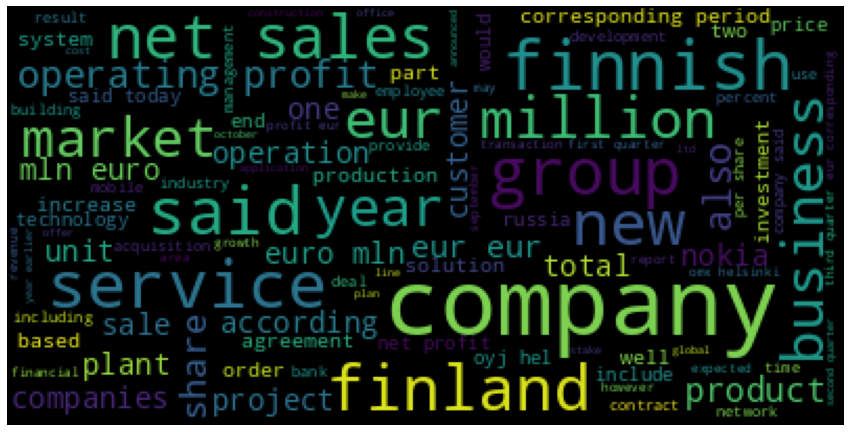

In [ ]:
nube_palabras(texto_wc, stopwords.words('english'), "black")

Sentiment Analysis Summary

In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB

In [ ]:
from pysentimiento import create_analyzer
sentiment_ = create_analyzer(task="sentiment", lang="en")
emotions_ = create_analyzer(task="emotion", lang="en")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "joy": 1,
    "others": 0,
    "sadness": 2,
    "surprise": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-emotion-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "joy": 1,
    "others": 0,
    "sadness": 2,
    "surprise": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/vocab.txt
loading file bpe.codes from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/bpe.codes
loading file added_tokens.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/added_tokens.json
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/tokenizer_config.json
loading configuration 

In [ ]:
def sentimientos(texto):
    return sentiment_.predict(texto).output

def emociones(texto):
    return emotions_.predict(texto).output

In [ ]:
#texto["sentimientos"] = texto.apply(sentimientos)
#texto["emociones"] = texto.resenias.apply(emociones)

texto['sentimientos'] = texto.iloc[:, 0].apply(sentimientos)
texto['emociones'] = texto.iloc[:, 0].apply(emociones)

In [ ]:
texto.head()

,1,sentimientos,emociones
0,"According to Gran , the company has no plans t...",NEU,others
1,Technopolis plans to develop in stages an area...,NEU,others
2,The international electronic industry company ...,NEG,others
3,With the new production plant the company woul...,POS,others
4,According to the company 's updated strategy f...,NEU,others


<AxesSubplot:>

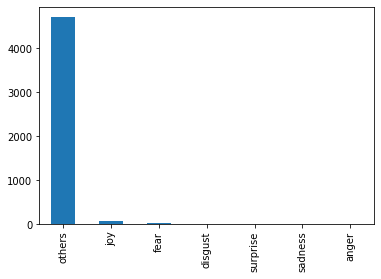

In [ ]:
texto.emociones.value_counts().plot(kind="bar")